# Image Classification with CNN

## Dataset: fashion_mnist

#### Dataset: https://www.tensorflow.org/datasets/catalog/fashion_mnist
#### Details about images: https://knowyourdata-tfds.withgoogle.com/#tab=STATS&dataset=fashion_mnist
####  More Details about dataset: https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/image_classification/mnist.py

    @article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume    = {abs/1708.07747},
      year      = {2017},
      url       = {http://arxiv.org/abs/1708.07747},
      archivePrefix = {arXiv},
      eprint    = {1708.07747},
      timestamp = {Mon, 13 Aug 2018 16:47:27 +0200},
      biburl    = {https://dblp.org/rec/bib/journals/corr/abs-1708-07747},
      bibsource = {dblp computer science bibliography, https://dblp.org}}

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

# 1. Importing Libraries|Read Data|Split Data

## 1.1. Importing Libraries

In [147]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

## 1.2. Load|Read|Split Data

**Download the fashion mnist dataset using Keras.**

In [148]:
from tensorflow.keras.datasets import fashion_mnist

In [149]:
fashion = fashion_mnist.load_data()

In [150]:
pd.DataFrame(fashion)

,0,1
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, ..."
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, ..."


In [151]:
len(pd.DataFrame(fashion)[0][0])  # x_train

60000

In [152]:
len(pd.DataFrame(fashion)[1][0])  # y_train

60000

In [153]:
len(pd.DataFrame(fashion)[0][1])  # x_test

10000

In [154]:
len(pd.DataFrame(fashion)[1][1])  # y_test

10000

**Split Data**

In [155]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [156]:
x_train.shape

(60000, 28, 28)

In [157]:
y_train.shape

(60000,)

In [158]:
x_test.shape

(10000, 28, 28)

In [159]:
y_test.shape

(10000,)

In [160]:
x_test[0].shape

(28, 28)

In [161]:
pd.DataFrame(x_test[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,3,1,0,0,7,0,37,0,0
8,0,0,0,0,0,0,0,0,0,0,...,11,0,0,0,0,0,0,119,0,0
9,0,0,0,0,0,0,0,0,0,0,...,110,0,0,0,0,22,93,106,0,0


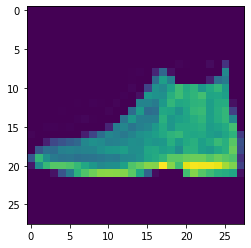

In [162]:
plt.imshow(x_test[0]);

In [163]:
for i in x_train:
    print(x_train[i].shape)

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

In [164]:
for i in x_test:
    print(x_test[i].shape)

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 28)
(28, 28, 28, 2

    Label    Description
    0        T-shirt/top
    1        Trouser
    2        Pullover
    3        Dress
    4        Coat
    5        Sandal
    6        Shirt
    7        Sneaker
    8        Bag
    9        Ankle boot

In [165]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [166]:
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# 2. Visualizing the Data

**Using matplotlib show an any image from the data set.**

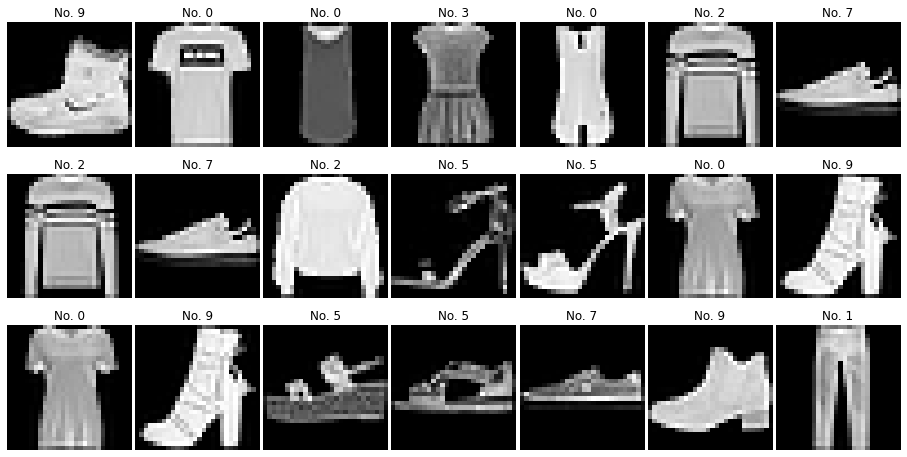

In [167]:
num_rows, num_cols = 3, 7
f, ax = plt.subplots(3, 7, figsize=(16,8),
                     gridspec_kw={'wspace':0.03, 'hspace':0.15}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(x_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

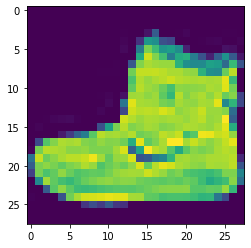

In [168]:
plt.imshow(x_train[0]);

In [169]:
y_train[0]
# 9 Ankle boot

9

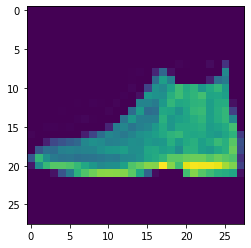

In [170]:
plt.imshow(x_test[0]);

In [171]:
y_test[0]
# 9 Ankle boot

9

# 3. Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [172]:
x_train[0].max()

255

In [173]:
x_train[0].min()

0

In [174]:
x_test[0].max()

255

In [175]:
x_train[0].min()

0

In [176]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

**Reshape**

In [177]:
x_train.shape

(60000, 28, 28)

In [178]:
x_test.shape

(10000, 28, 28)

In [179]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [180]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003922,0.015686,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.211765,0.000000,0.000000,0.000000,0.003922,0.011765,0.015686,0.000000,0.000000,0.011765
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.564706,0.482353,0.090196,0.000000,0.000000,0.000000,0.000000,0.047059,0.039216,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.419608,0.611765,0.631373,0.427451,0.250980,0.090196,0.301961,0.509804,0.282353,0.058824
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.847059,0.639216,0.498039,0.474510,0.478431,0.572549,0.552941,0.345098,0.674510,0.258824
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,...,0.874510,0.874510,0.843137,0.835294,0.643137,0.498039,0.482353,0.768627,0.898039,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.921569,0.890196,0.878431,0.870588,0.878431,0.866667,0.874510,0.960784,0.678431,0.000000


In [181]:
X_train = x_train.reshape(x_train.shape[0],28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [182]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [183]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

In [184]:
y_train.shape

(60000,)

In [185]:
y_test.shape

(10000,)

In [186]:
y_train = y_train.reshape(-1, 1)

In [187]:
y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

In [188]:
ohe = OneHotEncoder(sparse=False)
y_train = ohe.fit_transform(y_train)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [189]:
y_train.shape

(60000, 10)

In [190]:
y_test.shape

(10000,)

In [191]:
y_test = y_test.reshape(-1, 1)
y_test

array([[9],
       [2],
       [1],
       ...,
       [8],
       [1],
       [5]], dtype=uint8)

In [192]:
ohe = OneHotEncoder(sparse=False)
y_test = ohe.fit_transform(y_test)
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [2]:
y_test.shape

NameError: name 'y_test' is not defined

## 4. Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [49]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))  
model.add(MaxPool2D(pool_size=(2,2), strides = (1,1))) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))  
model.add(Dense(10, activation='softmax')) 

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 17500)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2240128   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
_________________________________________________________________


###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [51]:
model.fit(X_train, y_train,
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 89s 46ms/step - loss: 0.3863 - accuracy: 0.8636
Epoch 2/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2550 - accuracy: 0.9096
Epoch 3/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2170 - accuracy: 0.9233
Epoch 4/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1912 - accuracy: 0.9312
Epoch 5/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1710 - accuracy: 0.9398
Epoch 6/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1564 - accuracy: 0.9454
Epoch 7/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.1423 - accuracy: 0.9511
Epoch 8/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1304 - accuracy: 0.9546
Epoch 9/10
1875/1875 [==============================] - 83s 45ms/step - loss: 0.1193 - accuracy: 0.9585
Epoch 10/10
1875/1875 [==============================] - 86s 46m

In [1]:
summary = pd.DataFrame(model.history.history)
summary.head()

<IPython.core.display.Javascript object>

NameError: name 'model' is not defined

In [53]:
summary

,loss,accuracy
0,0.386321,0.863567
1,0.255007,0.909633
2,0.217011,0.923317
3,0.191221,0.931250
4,0.171028,0.939783
5,0.156362,0.945417
6,0.142265,0.951083
7,0.130352,0.954583
8,0.119302,0.958517
9,0.111576,0.962617


**Plot values of metrics you used in your model.**

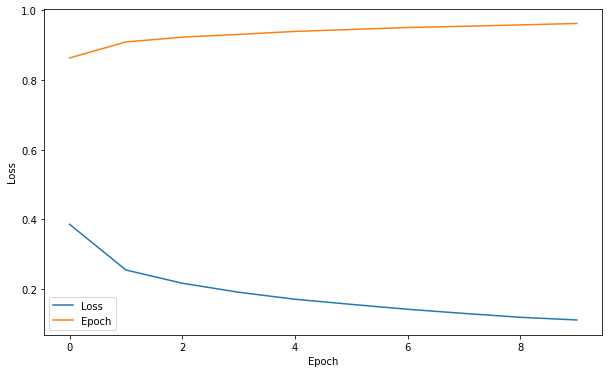

In [54]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.accuracy, label="accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss", "Epoch"], loc='best')

In [55]:
model.metrics_names

['loss', 'accuracy']

In [56]:
model.history.history

{'loss': [0.3863208293914795,
  0.25500747561454773,
  0.21701140701770782,
  0.19122080504894257,
  0.17102837562561035,
  0.15636153519153595,
  0.14226466417312622,
  0.13035227358341217,
  0.11930152773857117,
  0.11157558858394623],
 'accuracy': [0.8635666370391846,
  0.9096333384513855,
  0.9233166575431824,
  0.9312499761581421,
  0.9397833347320557,
  0.9454166889190674,
  0.9510833621025085,
  0.9545833468437195,
  0.9585166573524475,
  0.9626166820526123]}

**Train the model using earlystop.**

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
early_stop = EarlyStopping(monitor='val_loss', patience = 5)

In [59]:
model.fit(X_train, y_train, 
          batch_size=32, 
          epochs=10, 
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.1019 - accuracy: 0.9654 - val_loss: 0.3970 - val_accuracy: 0.9065
Epoch 2/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0942 - accuracy: 0.9680 - val_loss: 0.4021 - val_accuracy: 0.9040
Epoch 3/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0878 - accuracy: 0.9697 - val_loss: 0.4234 - val_accuracy: 0.9015
Epoch 4/10
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0846 - accuracy: 0.9719 - val_loss: 0.4805 - val_accuracy: 0.9013
Epoch 5/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0795 - accuracy: 0.9737 - val_loss: 0.5135 - val_accuracy: 0.9015
Epoch 6/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0745 - accuracy: 0.9756 - val_loss: 0.5236 - val_accuracy: 0.9050


In [60]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.101918,0.965383,0.396982,0.9065
1,0.094213,0.967967,0.402147,0.9040
2,0.087810,0.969700,0.423418,0.9015
3,0.084561,0.971933,0.480462,0.9013
4,0.079469,0.973717,0.513485,0.9015


In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 17500)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2240128   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
_________________________________________________________________


**Plot values of metrics you used in your model.**

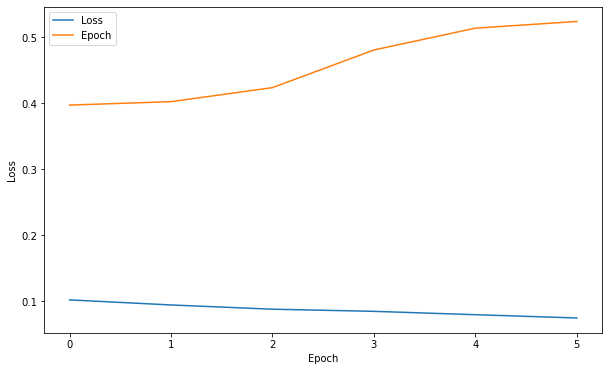

In [62]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss", "Epoch"], loc='best')

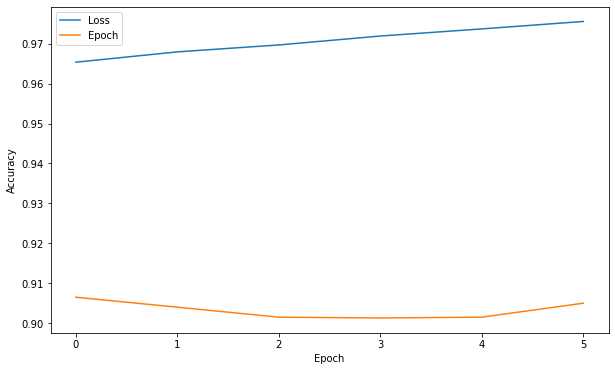

In [63]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Loss", "Epoch"], loc='best')

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
preds = model.predict(X_test)

In [66]:
preds

array([[2.8104385e-13, 6.4394491e-19, 5.9112849e-13, ..., 7.5021063e-07,
        2.2500294e-14, 9.9999917e-01],
       [6.3601542e-21, 0.0000000e+00, 1.0000000e+00, ..., 7.6739040e-32,
        7.5653058e-34, 0.0000000e+00],
       [3.8015543e-17, 1.0000000e+00, 8.3459496e-23, ..., 2.5338525e-15,
        7.2359940e-17, 1.5323345e-22],
       ...,
       [2.8648127e-20, 0.0000000e+00, 2.2942604e-29, ..., 3.0441540e-17,
        1.0000000e+00, 0.0000000e+00],
       [3.9065520e-16, 1.0000000e+00, 5.5889537e-20, ..., 1.8523965e-18,
        7.1021881e-16, 1.0994404e-18],
       [3.8824635e-04, 1.3159372e-08, 9.0314850e-02, ..., 6.5381259e-01,
        1.6580998e-04, 3.3376683e-04]], dtype=float32)

In [67]:
preds[0]

array([2.8104385e-13, 6.4394491e-19, 5.9112849e-13, 2.7849874e-19,
       1.3885989e-16, 7.1870680e-08, 3.0535541e-10, 7.5021063e-07,
       2.2500294e-14, 9.9999917e-01], dtype=float32)

In [77]:
predictions= np.argmax(preds, axis=1)
predictions

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [78]:
len(predictions)

10000

In [133]:
predictions.shape

(10000,)

In [194]:
y_test_class= np.argmax(y_test, axis=1)
y_test_class

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [195]:
y_test_class.shape

(10000,)

In [196]:
y_test_class

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [197]:
print(classification_report(y_test_class, predictions))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.87      0.85      0.86      1000
           3       0.90      0.89      0.90      1000
           4       0.86      0.85      0.85      1000
           5       0.99      0.96      0.98      1000
           6       0.70      0.78      0.74      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.90      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [198]:
print(confusion_matrix(y_test_class, predictions))

[[830   0  19  22   3   0 120   1   5   0]
 [  2 970   2  14   4   0   6   0   2   0]
 [ 15   1 848   5  53   0  78   0   0   0]
 [ 13  12  11 893  24   0  45   0   2   0]
 [  1   1  49  28 851   0  67   0   3   0]
 [  0   0   0   1   0 965   1  19   1  13]
 [ 84   2  46  24  56   0 782   0   6   0]
 [  0   0   0   0   0   5   0 983   0  12]
 [  2   1   0   3   1   3  10   2 976   2]
 [  1   0   0   0   0   5   1  41   0 952]]


In [199]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5236315727233887
Test accuracy: 0.9049999713897705


# Prediction

In [201]:
y_train_class= np.argmax(y_test, axis=1)
y_train_class

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

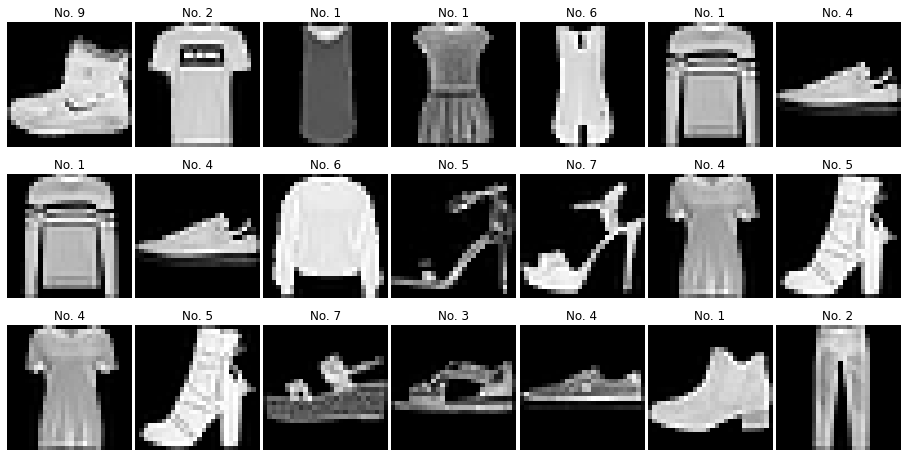

In [205]:
num_rows, num_cols = 3, 7
f, ax = plt.subplots(3, 7, figsize=(16,8),
                     gridspec_kw={'wspace':0.03, 'hspace':0.15}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train_class[image_index])
plt.show()
plt.close()

In [206]:
X_test[0].shape

(28, 28, 1)

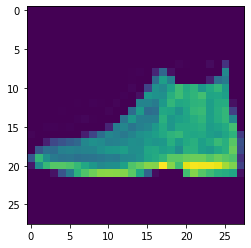

In [209]:
plt.imshow(X_test[0].reshape(28,28))

In [210]:
model.predict(X_test[0].reshape(1,28,28,1))

array([[2.8104385e-13, 6.4394243e-19, 5.9112627e-13, 2.7849662e-19,
        1.3886095e-16, 7.1870545e-08, 3.0535249e-10, 7.5020705e-07,
        2.2500380e-14, 9.9999917e-01]], dtype=float32)

In [215]:
np.argmax(model.predict(X_test[0].reshape(1,28,28,1)), axis=1)
# 9 Ankle boot

array([9], dtype=int64)

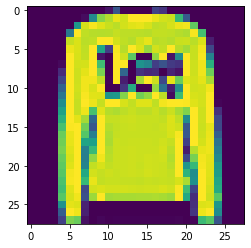

In [213]:
plt.imshow(X_test[1].reshape(28,28))

In [214]:
np.argmax(model.predict(X_test[1].reshape(1,28,28,1)), axis=1)
# 2 Pullover

array([2], dtype=int64)

In [ ]:
    Label    Description
    0        T-shirt/top
    1        Trouser
    2        Pullover
    3        Dress
    4        Coat
    5        Sandal
    6        Shirt
    7        Sneaker
    8        Bag
    9        Ankle boot

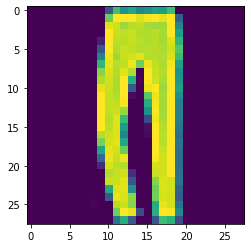

In [216]:
plt.imshow(X_test[2].reshape(28,28))

In [218]:
np.argmax(model.predict(X_test[2].reshape(1,28,28,1)), axis=1)
# 1 Trouser

array([1], dtype=int64)

# End of Assignment

In [219]:
model.save("fashion_mnist.h5")